In [1]:
import os
os.chdir(r'C:\Users\82107\바탕 화면\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\바탕 화면\Study\ML learning


In [2]:
# 행렬을 다루기 위한 모듈을 불러온다.
import numpy as np

mu0 = [0, 0] #평균벡터
sigma0 = np.array([[1, 0.5], [0.5, 1]]) #공분산행렬 (분산이 1이고 공분산이 0.5인 행렬)
sigma1 = np.array([[1, 0.5], [0.5, 1]])

#2차원 다변량 정규분포로 가정한 데이터
x = np.random.multivariate_normal(mu0, sigma0, 5000) #다변량 정규분포를 통해 5000개 데이터 생성
x[2000:, 0] = x[2000:, 0] + 2 #2000개까진 평균이 (0, 0)이지만 2000개 이후에는 (2, 2)
x[2000:, 1] = x[2000:, 1] + 2
y = np.ones((5000, )) #전체 데이터는 5000개
# 처음 2000개의 데이터는 label을 0으로 지정, 나머지 label은 1
y[:2000] = 0 # 처음 2000개는 0, 나머지는 1로 지정

In [3]:
# 데이터 확인
x[:6, :]

array([[-0.52336881, -0.92272504],
       [ 0.77739854,  0.0583728 ],
       [-0.34275541, -1.94182204],
       [ 0.5689425 ,  0.38403765],
       [ 2.1444347 ,  0.80942467],
       [ 0.54990572,  0.40696249]])

In [4]:
y[:6]

array([0., 0., 0., 0., 0., 0.])

In [5]:
mu0 = np.array([[0], [0]])
mu0

array([[0],
       [0]])

In [6]:
mu1 = np.array([[5], [5]])
mu1

array([[5],
       [5]])

In [7]:
sigma0

array([[1. , 0.5],
       [0.5, 1. ]])

In [8]:
sigma1

array([[1. , 0.5],
       [0.5, 1. ]])

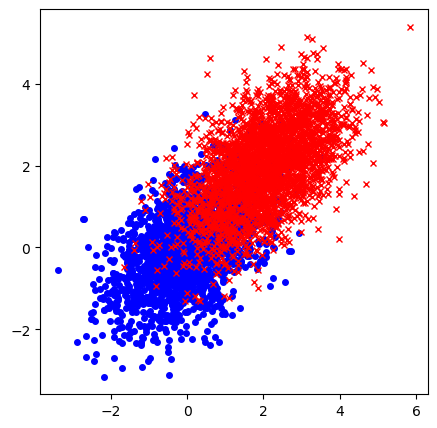

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5,5))
colors = ['blue', 'red']
markers = ['o', 'x']
for i in range(2):
    if i == 0:
        ax.plot(x[:2000,0], x[:2000, 1],
               color=colors[0], linestyle='', marker=markers[i], markersize=4) #처음 2000개
    else:
        ax.plot(x[2000: ,0], x[2000:, 1],
               color=colors[1], linestyle='', marker=markers[i], markersize=4) #나머지 것들

In [12]:
sample_x = np.array([[0.5], [0.5]])

# 실제 모수를 이용하여 계산한 pdf 값
def f_x_y0(x): # 수식 12
    const = 1 / (2*np.pi * np.power(np.linalg.det(sigma0), 1/2))
    return const * np.exp(-0.5 * (x - mu0).T @ np.linalg.inv(sigma0) @ (x - mu0))[0, 0]

def f_x_y1(x): # 수식 13
    const = 1 / (2*np.pi * np.power(np.linalg.det(sigma1), 1/2))
    return const * np.exp(-0.5 * (x - mu1).T @ np.linalg.inv(sigma1) @ (x - mu1))[0, 0]

f_x_y0(sample_x)

0.1555632781262252

In [13]:
f_x_y1(sample_x)

2.5194978625486887e-07

In [14]:
# 모수에 대한 추정

mu0_hat = np.mean(x[:2000, :], axis=0)
mu0_hat

array([ 0.0096519 , -0.01777969])

In [15]:
sigma0_hat = np.cov(x[:2000, :].T)
sigma0_hat 

array([[0.98684161, 0.50252132],
       [0.50252132, 0.99097135]])

In [16]:
mu1_hat = np.mean(x[2000:, :], axis=0)
mu1_hat 

array([2.02105594, 1.9966886 ])

In [17]:
sigma1_hat = np.cov(x[2000:, :].T)
sigma1_hat 

array([[1.05516896, 0.54444292],
       [0.54444292, 1.02505794]])

In [18]:
# label 0에 해당하는 임의의 sample 데이터
sample_x = np.array([[0.5], [0.5]])

# 추정된 모수를 이용하여 계산한 pdf 값
def fhat_x_y0(x): # 수식 12
    const = 1 / (2*np.pi * np.power(np.linalg.det(sigma0_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu0_hat).T @ np.linalg.inv(sigma0_hat) @ (x - mu0_hat))[0, 0]

def fhat_x_y1(x): # 수식 13
    const = 1 / (2*np.pi * np.power(np.linalg.det(sigma1_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu1_hat).T @ np.linalg.inv(sigma1_hat) @ (x - mu1_hat))[0, 0]

#추정한 parameter에 기반해서 구할 수 있는 pdf값을 정의
fhat_x_y0(sample_x)

0.15904306126321477

In [19]:
fhat_x_y1(sample_x)

0.04169038177043636

In [20]:
# 각 label에 대한 추정된 prior 확률
p0 = 2000 / 5000
p1 = 3000 / 5000

def bayse_prob(x, y): # 수식 11
    if y == 1: #y가 label이 1일때
        return f_x_y1(x)*p1 / (f_x_y0(x)*p0 + f_x_y1(x)*p1)
    else:
        return f_x_y0(x)*p0 / (f_x_y0(x)*p0 + f_x_y1(x)*p1)
    
#실제 사후확률을 알 수 있음

bayse_prob(sample_x, 0)

0.9999975706107135

In [22]:
bayse_prob(sample_x, 1)

2.4293892865222728e-06

In [29]:
# LDA를 사용하기 위한 모듈을 불러온다
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#component가 중요함, LDA 적합
lda = LinearDiscriminantAnalysis(n_components=1, solver="svd", store_covariance=True).fit(x, y)
# 추정된 모수를 확인
lda_means = lda.means_ #각 라벨별로 계산된 sample mean

In [30]:
mu0 = lda_means[0, :]
mu0

array([ 0.0096519 , -0.01777969])

In [24]:
mu1 = lda_means[1, :]
mu1

array([2.02105594, 1.9966886 ])

In [26]:
lda_cov = lda.covariance_
lda_cov 

array([[1.02742962, 0.52746489],
       [0.52746489, 1.0110201 ]])

In [27]:
# 각 label에 대한 prior 확률
pi0 = 2000 / 5000
pi1 = 3000 / 5000

# 판별식을 직접 만들어서 구하기
def discriminator(x): # 수식 8 (sample(x))는 0.5, 0.5임)
    d0 = x.T @ np.linalg.inv(lda_cov) @ mu0 - 0.5 * mu0.T @ np.linalg.inv(lda_cov) @ mu0 + np.log(pi0)
    d1 = x.T @ np.linalg.inv(lda_cov) @ mu1 - 0.5 * mu1.T @ np.linalg.inv(lda_cov) @ mu1 + np.log(pi1)
    return [d0[0], d1[0]]

# 판별식 계산
discriminator(sample_x)

[-0.919460877978253, -1.8211907710953792]

In [28]:
#0이 더 큰 것을 확인할 수 있음
np.argmax(discriminator(sample_x))

0

In [ ]:
#LinearDiscriminantAnalysis을 통해서도 바로 구할 수 있음